In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.simplefilter("ignore", UserWarning)


In [7]:
import kagglehub


path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-recommendation-dataset


## About Dataset

🌾 **Context**  
Este conjunto de dados é estruturado para prever a cultura mais adequada para o cultivo com base em diversos parâmetros agroclimáticos. É normalmente utilizado em aplicações de agricultura de precisão e aprendizado de máquina, visando apoiar agricultores, consultores agrícolas e formuladores de políticas.

---

### **Features (Inputs):**

- **N** – Nitrogen content in the soil (in mg/kg)
- **P** – Phosphorus content in the soil (in mg/kg)
- **K** – Potassium content in the soil (in mg/kg)
- **temperature** – Average temperature in °C
- **humidity** – Average relative humidity in %
- **ph** – Soil pH value
- **rainfall** – Rainfall in mm

---

### **Label (Output):**

- **label** – The crop most suited to the given conditions (e.g., rice, maize, cotton, etc.)


source : [link](https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset)


# Classificação

In [8]:
dataset = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
print(dataset.isna().sum())
print(dataset.isnull().sum())
dataset.describe()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Arvore de decisão - CLF

In [10]:
y = dataset.loc[:, "label"].values
y.shape

(2200,)

In [11]:
y_head = pd.DataFrame(y)
y_head.head()

,0
0,rice
1,rice
2,rice
3,rice
4,rice


In [12]:
X = dataset.loc[:, ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=42)

In [14]:
arvore_agro = DecisionTreeClassifier(criterion="entropy")

In [15]:
arvore_agro.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [16]:
X_teste.iloc[0,:]

,1451
N,101.000000
P,17.000000
K,47.000000
temperature,29.494014
humidity,94.729813
ph,6.185053
rainfall,26.308209


In [17]:
y_teste[0]

'muskmelon'

In [18]:
pred = arvore_agro.predict([ X_teste.iloc[0, :] ])
print(pred);

['muskmelon']


In [19]:
arvore_agro.score(X_teste, y_teste)

0.9763636363636363

In [20]:
from sklearn.metrics import classification_report

predicoes = arvore_agro.predict(X_teste)

print(classification_report(y_teste, predicoes))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.92      0.96      0.94        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.80      0.89      0.84        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      0.91      0.95        23
       mango       1.00      1.00      1.00        27
   mothbeans       0.96      0.96      0.96        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        19
      papaya       1.00    

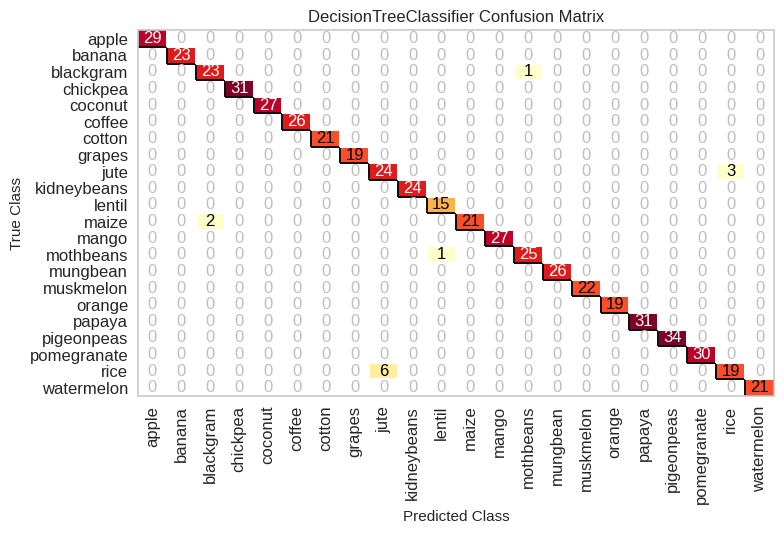

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_agro)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)
cm.poof()

### label encoder

In [22]:
dataset["label"].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [23]:
aux = dataset["label"]
aux

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [24]:
from sklearn.preprocessing import LabelEncoder

lbc = LabelEncoder()
resultado = lbc.fit_transform(dataset["label"])
preview = pd.DataFrame(resultado, columns=["label"])
preview.value_counts()

,count
label,
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100


In [25]:
preview["original_label"] = aux
preview.value_counts()

,,count
label,original_label,
0,apple,100
1,banana,100
2,blackgram,100
3,chickpea,100
4,coconut,100
5,coffee,100
6,cotton,100
7,grapes,100
8,jute,100


In [26]:
dataset["label"] = resultado


In [27]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


<Axes: >

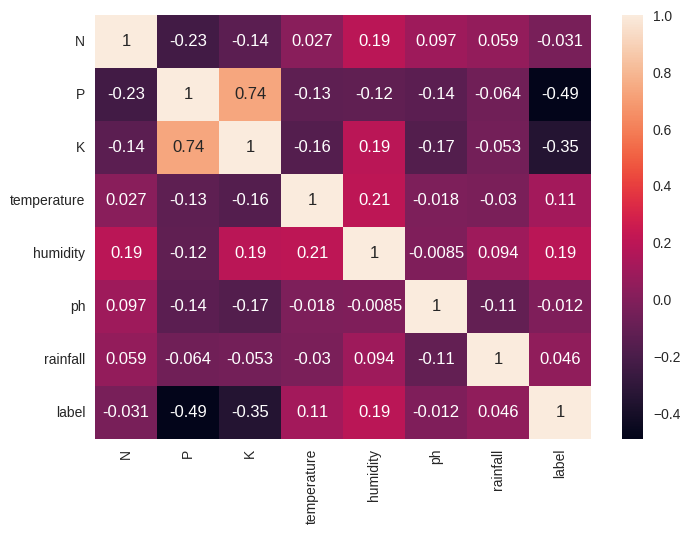

In [28]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True)

In [29]:
y_label_encoder = dataset.loc[:, "label"].values
y_label_encoder.shape

(2200,)

In [30]:
y_label_encoder_head = pd.DataFrame(y_label_encoder)
y_label_encoder_head.head()


,0
0,20
1,20
2,20
3,20
4,20


In [31]:
X = dataset.loc[:, ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
X.head()


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_treino, X_teste, y_treino_LABEL_ENCODER, y_teste_LABEL_ENCODER = train_test_split(X,y_label_encoder, random_state=42)

arvore_agro = DecisionTreeClassifier(criterion="entropy")

arvore_agro.fit(X_treino, y_treino_LABEL_ENCODER)


DecisionTreeClassifier(criterion='entropy')

In [33]:
print(arvore_agro.score(X_teste, y_teste_LABEL_ENCODER))

from sklearn.metrics import classification_report

predicoes = arvore_agro.predict(X_teste)

print(classification_report(y_teste_LABEL_ENCODER, predicoes))


0.9836363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        19
           8       0.83      0.93      0.88        27
           9       1.00      1.00      1.00        24
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       0.96      0.96      0.96        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
        

In [34]:
y_teste[0]

'muskmelon'

In [35]:
y_teste_LABEL_ENCODER[0]

np.int64(15)

In [36]:
pred = arvore_agro.predict([ X_teste.iloc[0, :] ])
print(pred);

[15]


In [37]:
preview.value_counts()

,,count
label,original_label,
0,apple,100
1,banana,100
2,blackgram,100
3,chickpea,100
4,coconut,100
5,coffee,100
6,cotton,100
7,grapes,100
8,jute,100


## Regressão logistica - CLF

In [38]:
from sklearn.model_selection import train_test_split


X_treino, X_teste, y_treino_LABEL_ENCODER, y_teste_LABEL_ENCODER = train_test_split(X,y_label_encoder, random_state=42)

In [39]:
X_treino.shape , y_treino_LABEL_ENCODER.shape,              X_teste.shape, y_teste_LABEL_ENCODER.shape

((1650, 7), (1650,), (550, 7), (550,))

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_treino, y_treino_LABEL_ENCODER)

LogisticRegression()

In [41]:
lr.score(X_teste, y_teste_LABEL_ENCODER)

0.9418181818181818

In [42]:
print(lr.intercept_)


[-0.00857057 -0.01414903 -0.02793995  0.0031704  -0.00421697  0.00166928
 -0.01915419 -0.00626489  0.00010472  0.01515257  0.00710442  0.02394811
  0.03449642  0.07219652 -0.00503178  0.00079068  0.00453925 -0.06147211
 -0.00442025  0.0042705  -0.01679881  0.00057567]


In [43]:
print(lr.coef_)

[[-6.72112650e-01  3.51424185e-01  1.10049527e+00 -2.39656690e-01
  -2.50003721e-01 -6.22764110e-02 -3.81261928e-01]
 [ 5.19771464e-01  2.51811603e-01  2.73175775e-01 -2.23738638e-01
  -4.26721597e-01 -1.19512024e-01  9.25654712e-02]
 [-2.17641202e-01  5.09219673e-01 -5.50293459e-01  3.86367517e-01
   6.60320285e-02 -1.40306584e-01  1.32050411e-01]
 [ 3.38889492e-02  3.71738014e-01  7.20765675e-01 -3.26917303e-02
  -6.47682002e-01  3.65830088e-02  1.29226000e-02]
 [-4.76199601e-01 -7.57571816e-01 -2.04578198e-01 -1.08218582e-01
   4.92305297e-01 -6.52330070e-02  3.97919029e-01]
 [ 8.88723260e-01 -6.63301861e-01 -3.53014622e-01  8.37580210e-02
  -6.13505914e-01  2.42356394e-02  3.70529875e-01]
 [ 7.57035639e-01 -1.65540811e-01 -7.94498198e-01 -2.24542904e-01
   9.83764021e-02 -4.42553282e-02  1.82280326e-02]
 [-5.95290601e-01  4.83311864e-01  1.36250456e+00 -1.75758821e-01
  -3.35131082e-01 -4.54964985e-02 -1.10905996e+00]
 [ 3.31108950e-01 -2.51364177e-01 -1.12034593e-01 -1.48299014e-0

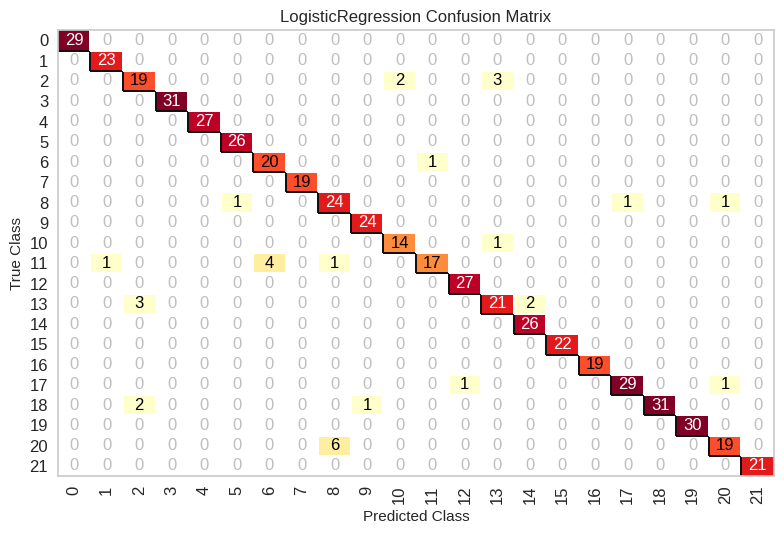

In [44]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr)
cm.fit(X_treino, y_treino_LABEL_ENCODER)
cm.score(X_teste, y_teste_LABEL_ENCODER)
cm.poof();

In [45]:
y_teste[0]

'muskmelon'

In [46]:
y_teste_LABEL_ENCODER[0]

np.int64(15)

In [47]:
pred = lr.predict([ X_teste.iloc[0, :] ])
print(pred);

[15]
